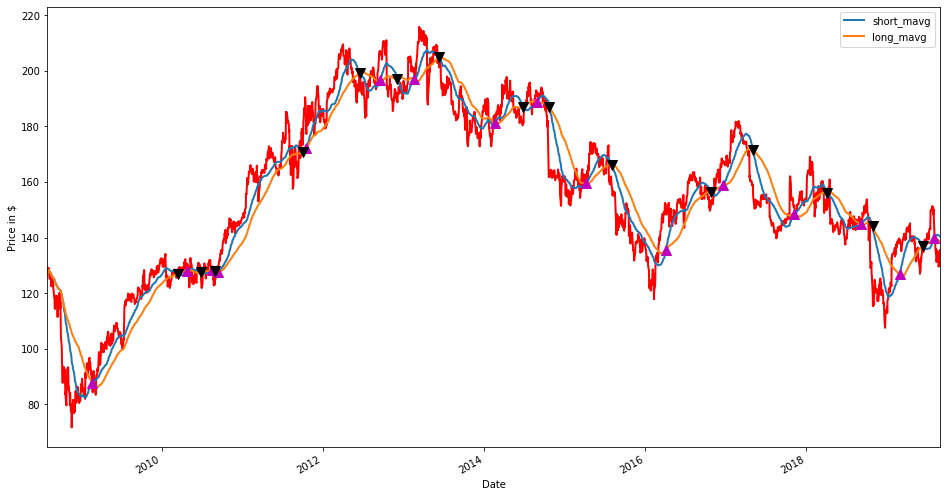

In [5]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import quandl 
import numpy as np
import matplotlib.pyplot as plt
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker,start=startdate, end=enddate))
    datas = map(data, tickers)
    return (pd.concat(datas, keys=tickers, names=['Ticker','Date']))

tickers = ['MSFT','IBM','GOOG']
all_data = get(tickers,datetime.datetime(2008,8,1),datetime.datetime(2019,8,30))

aapl = pdr.get_data_yahoo('AAPL', start=datetime.datetime(2006, 10, 1),end=datetime.datetime(2012, 1, 1))
ibm = pdr.get_data_yahoo('IBM',datetime.datetime(2008,8,1),datetime.datetime(2019,8,30))
qaapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")

short_window = 50
long_window = 100

signals = pd.DataFrame(index=ibm.index)
signals['signal'] = 0.0

signals['short_mavg'] = ibm['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals['long_mavg'] = ibm['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:],1.0,0.0)

signals['positions'] = signals['signal'].diff()

fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(111,ylabel='Price in $')

ibm['Close'].plot(ax=ax1, color='r', lw=2.)

signals[['short_mavg','long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals.loc[signals.positions == 1.0].index,
        signals.short_mavg[signals.positions == 1.0],
        '^', markersize=10,color='m')

ax1.plot(signals.loc[signals.positions == -1.0].index,
        signals.short_mavg[signals.positions == -1.0],
        'v', markersize=10,color='k')
plt.show()